## Part1: Exploratory Data Analysis:
### Analysis of features
### Finding Relations or Trends among Features

## Part2: Feature Engineering and Data Cleaning:
### Adding New Features
### Removing Redundant Features
### Convering Features into Suitable Form for Modeling

## Part3: Predictive Modeling
### Running Basic Algorithms
### Cross Validation
### Emsembling
### Important Feature Extraction

### Part1: Exploratory Data Analysis (EDA)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How Many Passengers Have Survived?

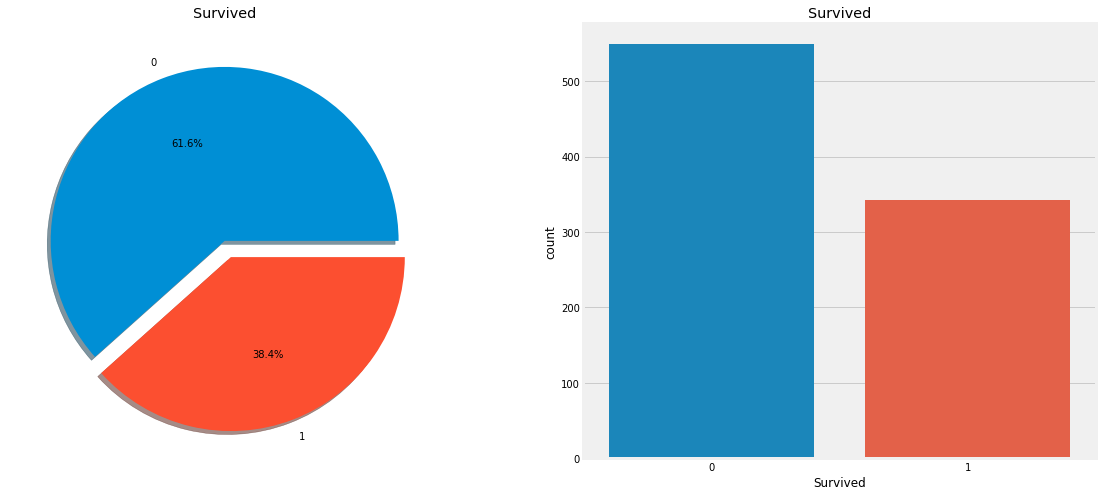

In [5]:
f,ax = plt.subplots(1,2, figsize=(18,8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                        autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

### Analysing Features

### Categorical Feature: SEX

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

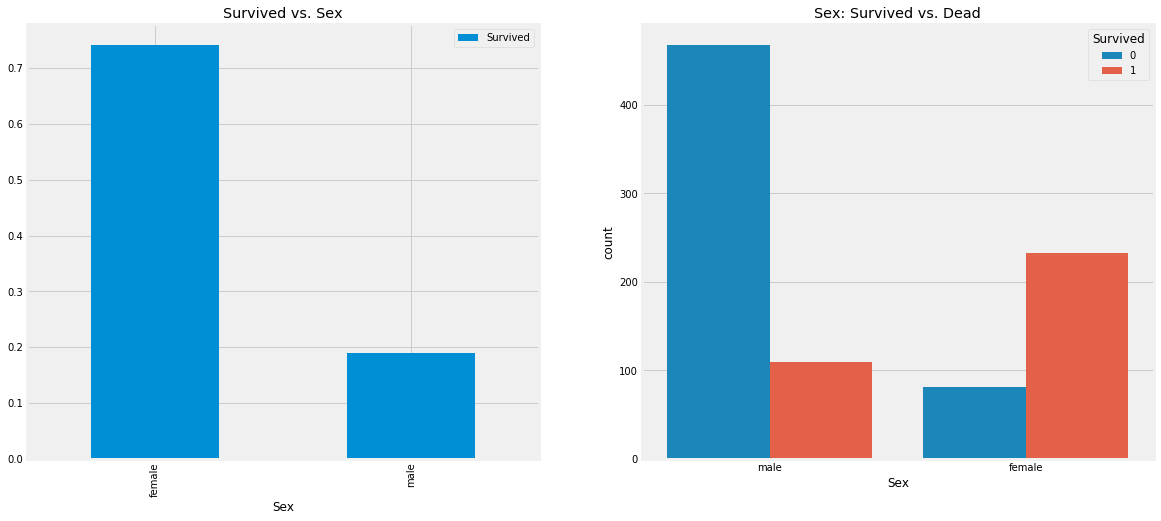

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

### Ordinal Feature: Pclass

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [9]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

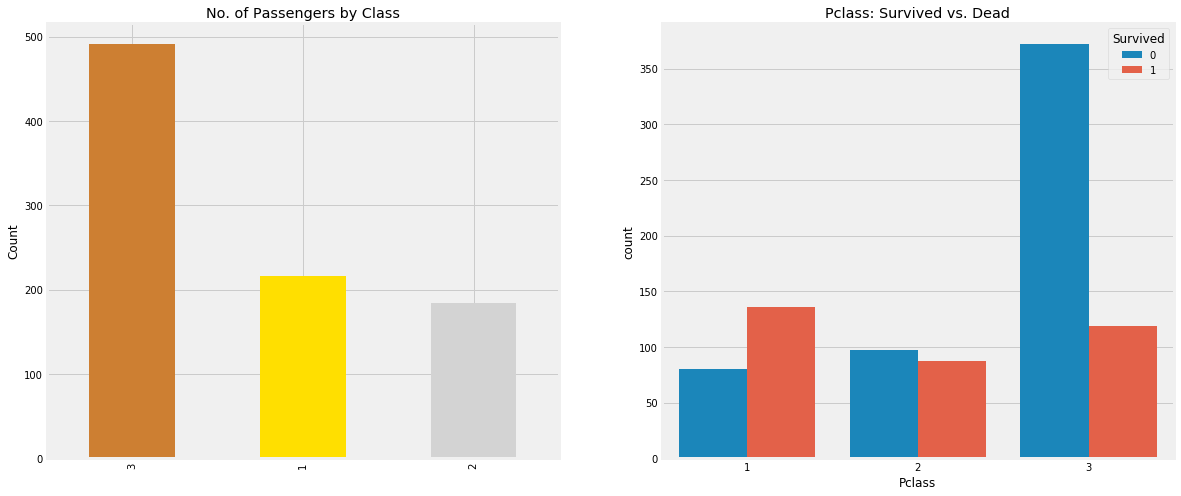

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('No. of Passengers by Class')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')

plt.show()

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

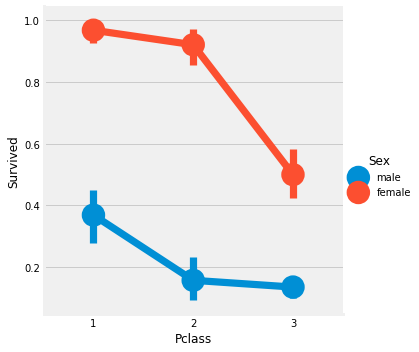

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

plt.show()

### Continuous Feature: Age

In [13]:
print('Oldest Passenger is {} years old'.format(data['Age'].max()))
print('Youngest Passenger is {} years old'.format(data['Age'].min()))
print('Average Passenger age is {:.2f} years'.format(data['Age'].mean()))

Oldest Passenger is 80.0 years old
Youngest Passenger is 0.42 years old
Average Passenger age is 29.70 years


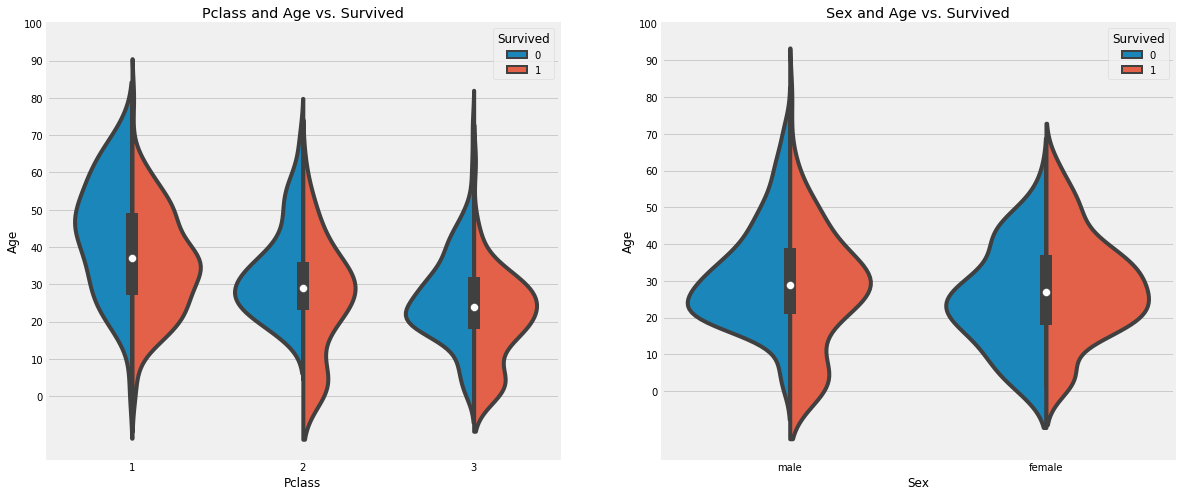

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue='Survived',data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

### Extracting Feature(Title/Initial) from Name Feature

In [15]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
data['Title'] = 0
for i in data:
  data['Title'] = data.Name.str.extract('([A-Za-z]+)\.')

In [17]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [18]:
pd.crosstab(data.Title, data.Sex).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
pd.crosstab(data.Title, data.Sex).style.background_gradient(cmap='summer_r')

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
data['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                   ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [21]:
data.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling Nan Values - Age

In [0]:
data.loc[(data.Age.isnull()) & (data.Title == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Title == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Title == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Title == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Title == 'Other'), 'Age'] = 46

In [23]:
data.Age.isnull().any()

False

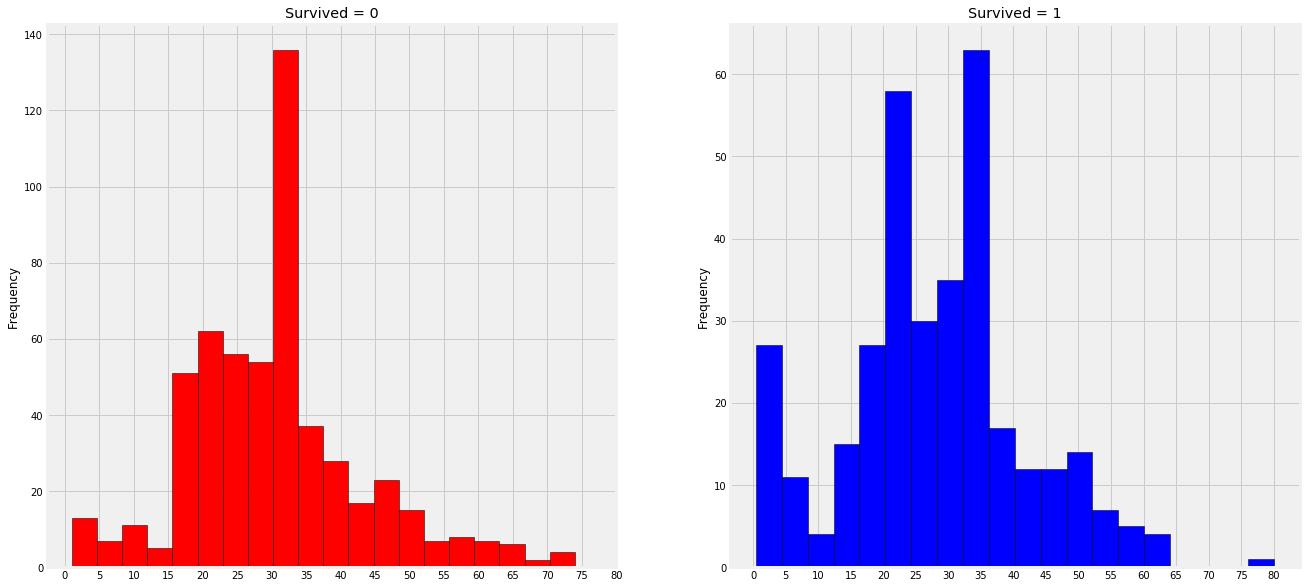

In [24]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, 
                                       edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(list(range(0,85,5)))

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='blue')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(list(range(0,85,5)))

plt.show()

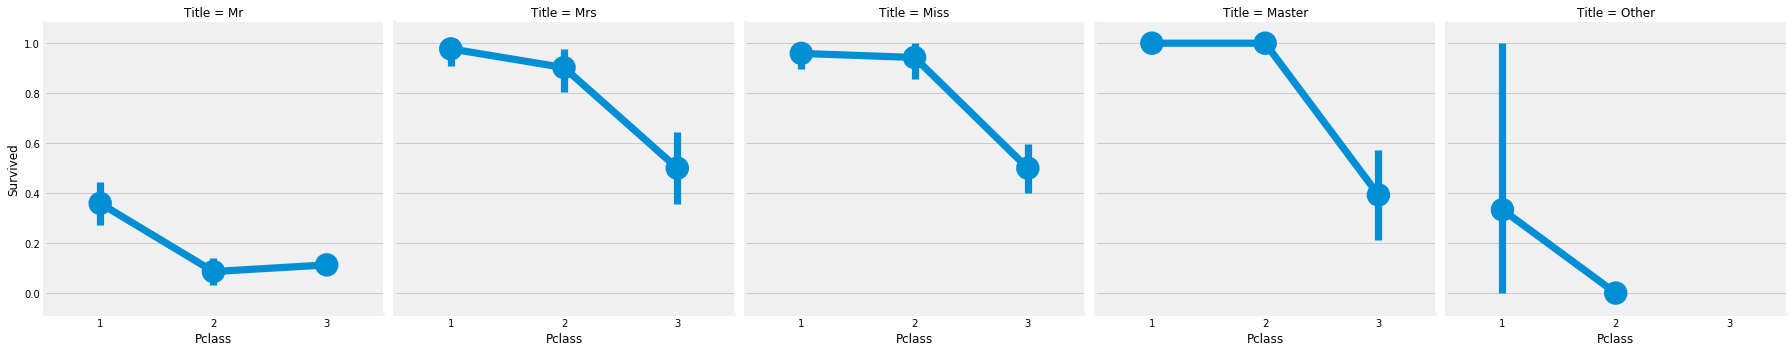

In [25]:
sns.factorplot('Pclass', 'Survived', col='Title', data=data)

plt.show()

### Categorical Value: Embarked

In [26]:
data['Embarked'].isnull().sum()

2

In [27]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived] ,margins=True).style.background_gradient(cmap='summer_r')

### Embarking Spot ~ Survival 

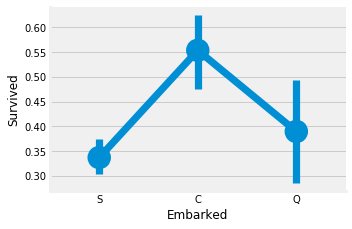

In [28]:
sns.factorplot('Embarked', 'Survived', data=data)

fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

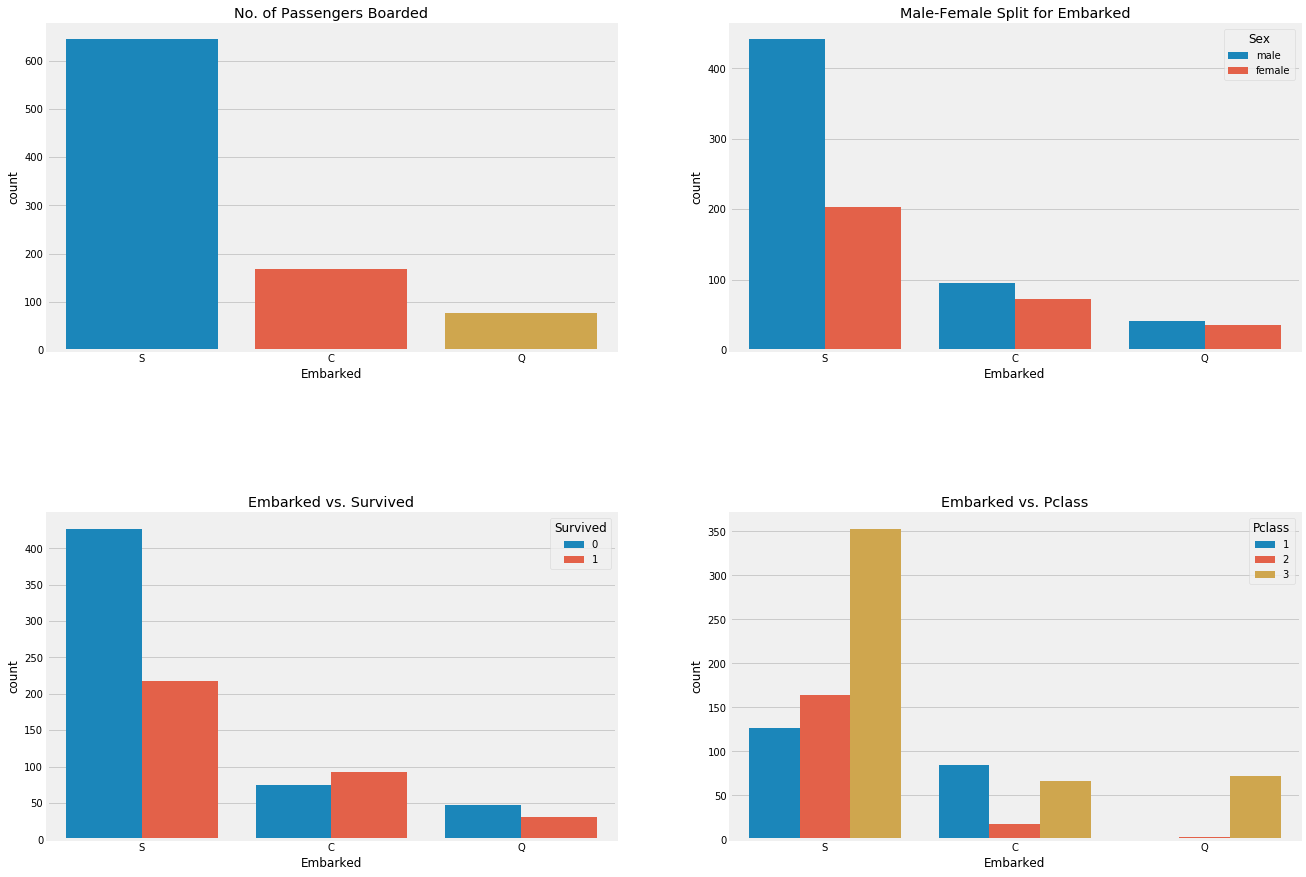

In [29]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title("Embarked vs. Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

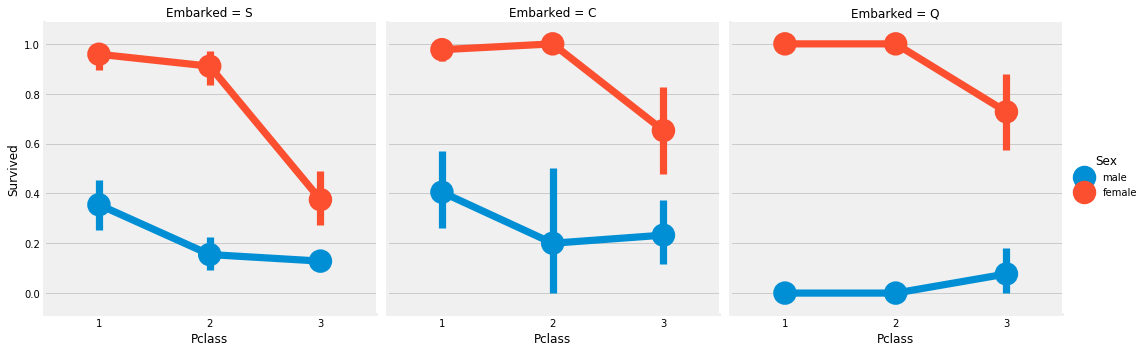

In [30]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

### Filling Embarked NaN

In [0]:
data['Embarked'].fillna('S', inplace=True)

In [32]:
data.Embarked.isnull().any()

False

In [33]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Discrete Feature: SibSp

In [34]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


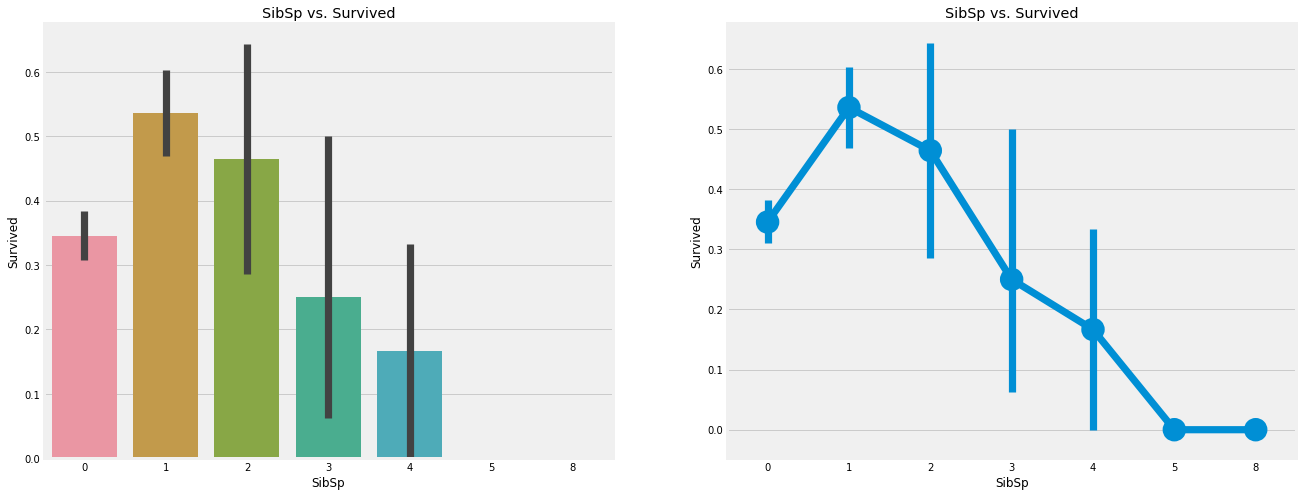

In [35]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')

plt.close(2)
plt.show()


In [36]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap ='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch

In [37]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


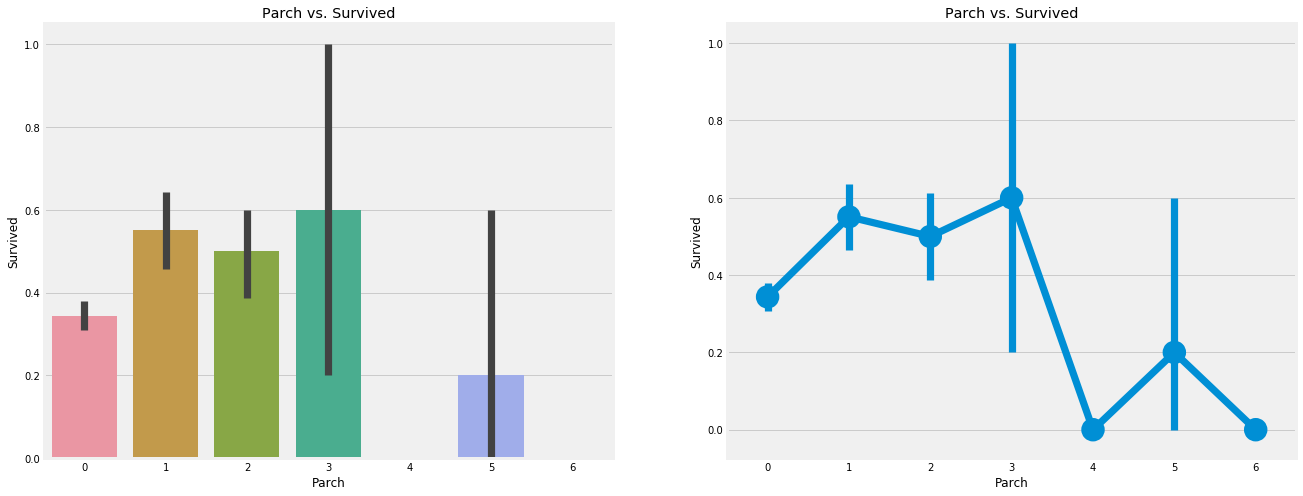

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title("Parch vs. Survived")

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs. Survived')

plt.close(2)
plt.show()

### Continuous Feature: Fare

In [39]:
print('Highest Fare was {:.2f}'.format(data['Fare'].max()))
print('Lowest Fare was {:.2f}'.format(data['Fare'].min()))
print('Average Fare was {:.2f}'.format(data['Fare'].mean()))

Highest Fare was 512.33
Lowest Fare was 0.00
Average Fare was 32.20


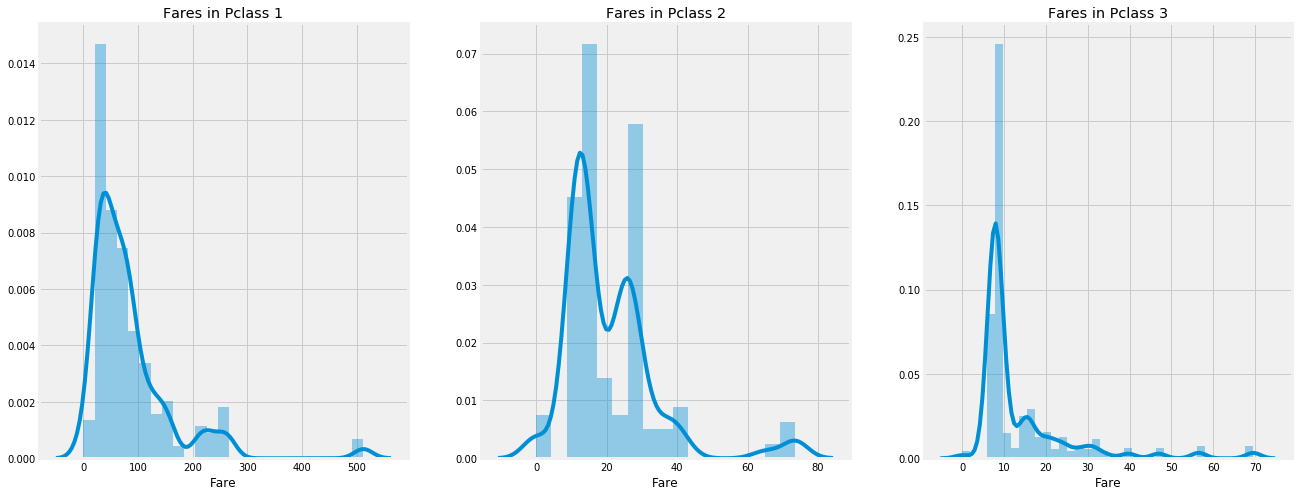

In [40]:
f, ax = plt.subplots(1, 3, figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

### Correlation Between Features

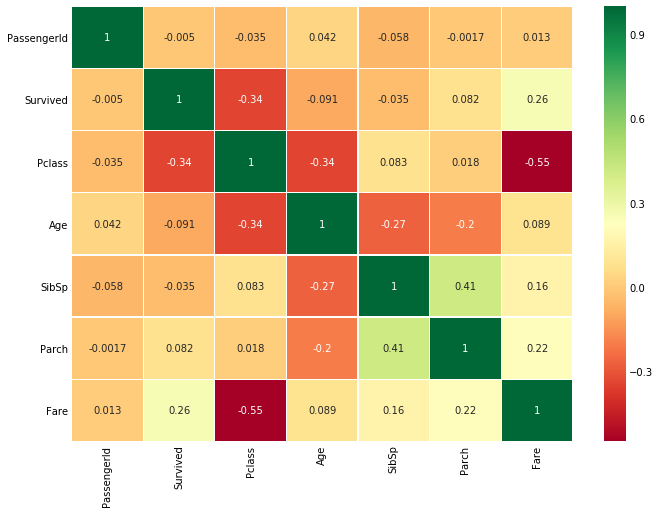

In [41]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### PART2: Feature Engineering and Data Cleaning

### Age_band

In [42]:
data['Age_n'] = 0
data.loc[data['Age'] <=16, 'Age_n'] = 0
data.loc[(data['Age'] >16) & (data['Age']<=32), 'Age_n'] = 1
data.loc[(data['Age'] >32) & (data['Age']<=48), 'Age_n'] = 2
data.loc[(data['Age'] >48) & (data['Age']<=64), 'Age_n'] = 3
data.loc[(data['Age'] >64), 'Age_n'] = 4

data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


In [43]:
data['Age_n'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_n
1,382
2,325
0,104
3,69
4,11


In [44]:
data['Age_n'].value_counts().to_frame()

,Age_n
1,382
2,325
0,104
3,69
4,11


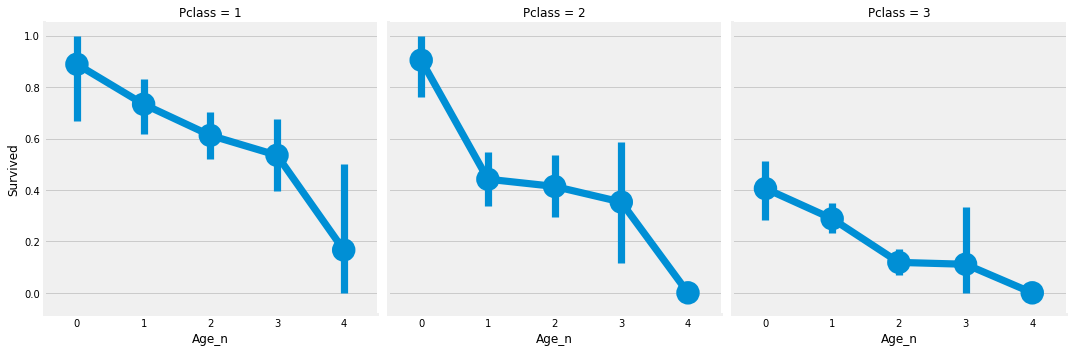

In [45]:
sns.factorplot('Age_n', 'Survived', data=data, col='Pclass')
plt.show()

### FamilySize

In [0]:
data['FamilySize'] = 0
data['FamilySize']=data['Parch'] + data['SibSp']

data['Alone'] = 0
data.loc[data.FamilySize==0, 'Alone']= 1

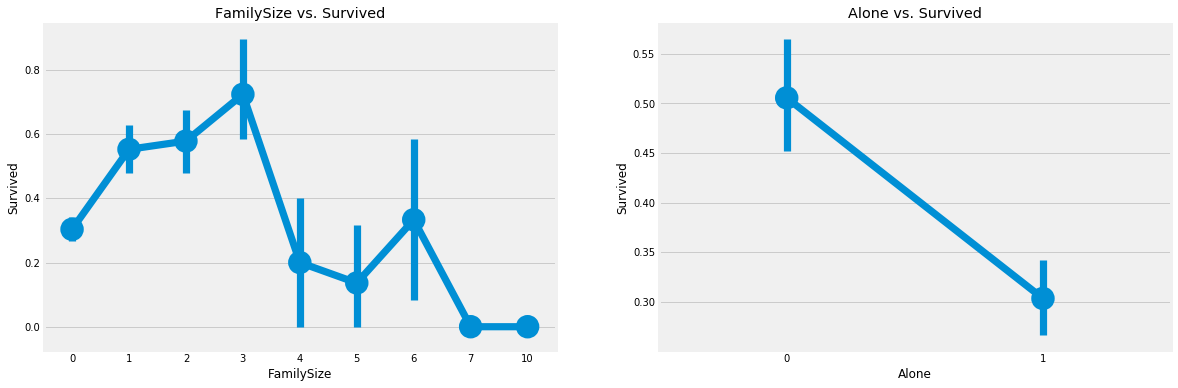

In [47]:
f, ax = plt.subplots(1, 2, figsize=(18,6))

sns.factorplot('FamilySize', 'Survived', data=data, ax=ax[0])
ax[0].set_title('FamilySize vs. Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs. Survived')

plt.close(2)
plt.close(3)
plt.show()

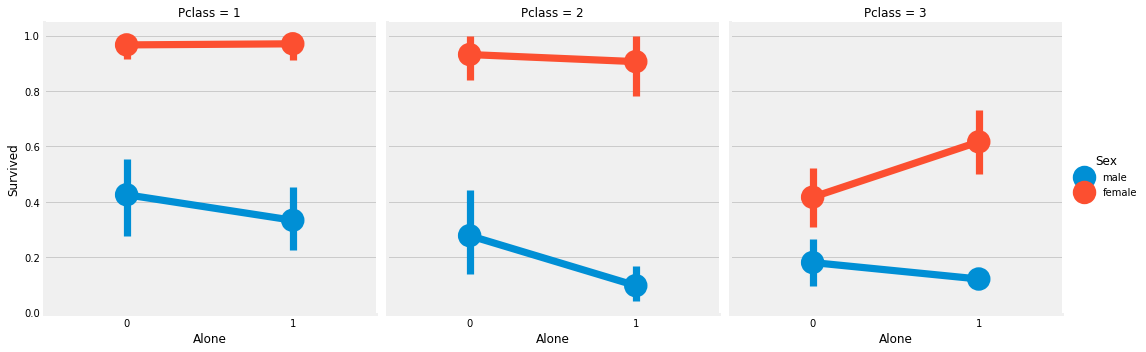

In [48]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')

plt.show()

### Fare_Range

In [49]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')



,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [0]:
data['Fare_cnt'] = 0

data.loc[data['Fare']<=7.91, 'Fare_cnt'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cnt'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cnt'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cnt'] = 3


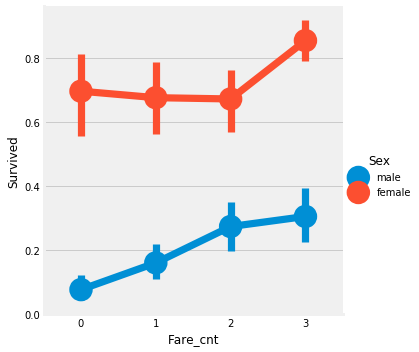

In [51]:
sns.factorplot('Fare_cnt', 'Survived', data=data, hue='Sex')

plt.show()

### Converting String Values into Numeric

In [0]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Title'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

### Dropping Unnecessary Features

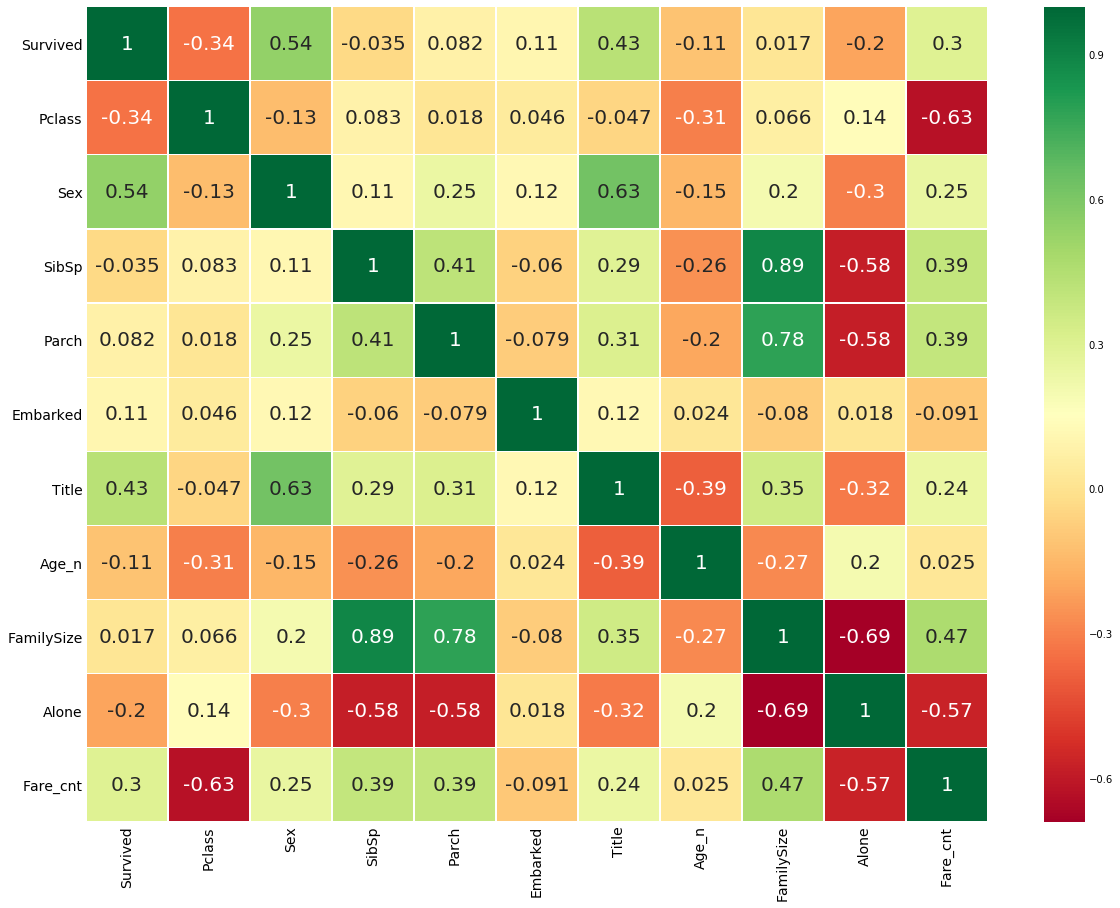

In [53]:

data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})

fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

### Predictive Modeling

#### 1)Logistic Regression

#### 2)Support Vector Machines(Linear and radial)

#### 3)Random Forest

#### 4)K-Nearest Neighbours

#### 5)Naive Bayes

#### 6)Decision Tree

#### 7)Logistic Regression

In [54]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title',
       'Age_n', 'FamilySize', 'Alone', 'Fare_cnt'],
      dtype='object')

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [0]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
y = data['Survived']

#### Radial Support Vector Machines(rbf-SVM)

In [57]:
model = svm.SVC(kernel =  'rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)

print('Accuracy for sbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for sbf SVM is 0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [58]:
model = svm.SVC(kernel = 'linear', C=0.1, gamma= 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)

print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [59]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)

print("The accuracy of the Logistic Regression is", metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


#### Decision Tree

In [60]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)

print('The accuracy of the ecision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the ecision Tree is 0.7985074626865671


#### K-Nearest Neighbours(KNN)

In [61]:
model=KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)

print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))


The accuracy of the KNN is 0.832089552238806


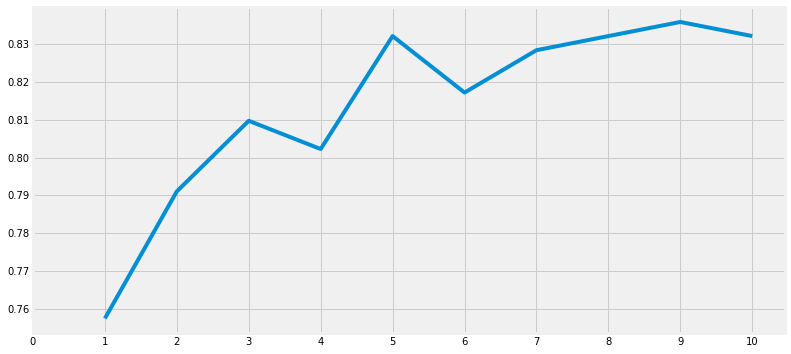

Accuracies for different values of n are:  [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [62]:
a_index=list(range(1,11))
a=pd.Series()

x=[0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
  
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print("Accuracies for different values of n are: ", a.values, 'with the max value as', a.values.max())

#### Gaussian Naive Bayes

In [63]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print("The accuracy of the NaiveBayes is", metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### RandomForests

In [64]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the RandomForest is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the RandomForest is 0.8171641791044776


### Cross Validation

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22) #split the part into 10 equal parts

xyz=[]
accuracy=[]
std=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(),
         KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(),
         RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
  
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)

new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.804744,0.027816
Naive Bayes,0.801386,0.028999
Random Forest,0.811511,0.036773


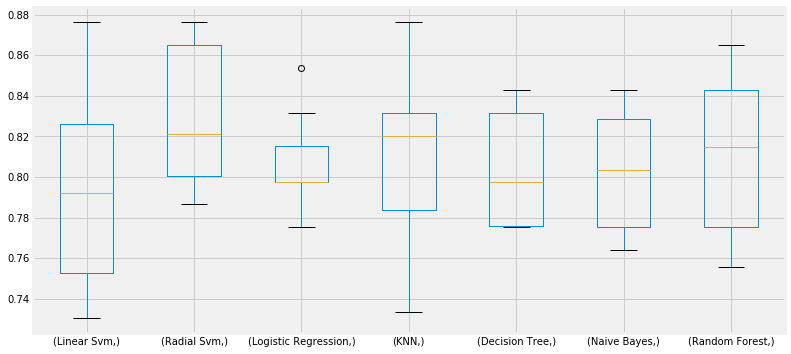

In [72]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

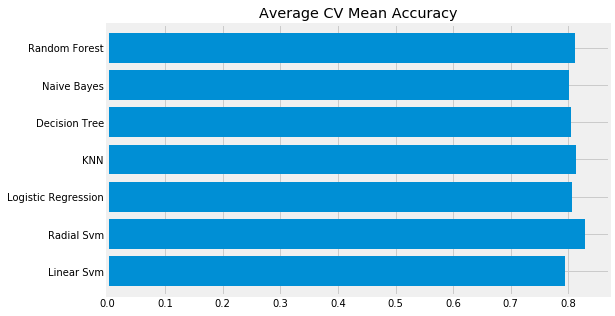

In [73]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix


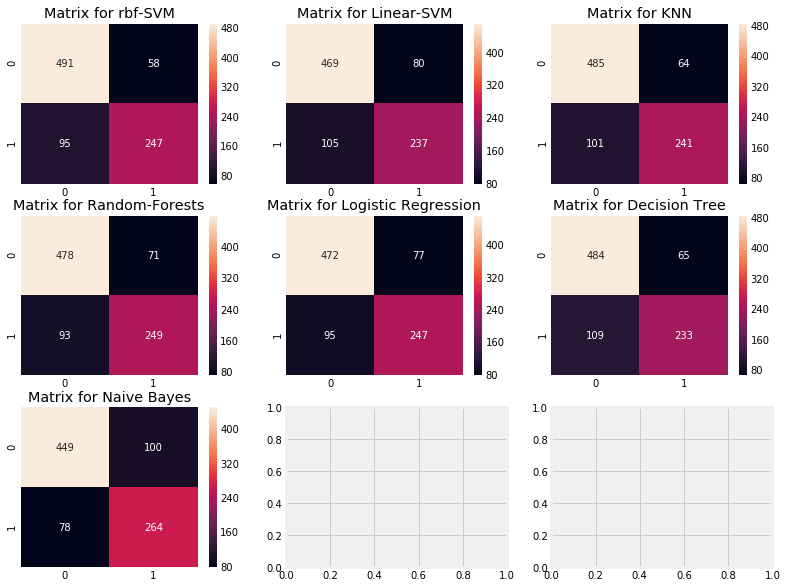

In [77]:
f, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Hyper-Parameters Tuning

#### SVM

In [82]:
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper={'kernel': kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose = True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   11.0s finished


#### RandomForest

In [83]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),
               param_grid=hyper, verbose=True)

gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   12.4s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


### Emsembling

1)Voting Classifier

2)Bagging

3)Boosting.

In [91]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf',
                                                               C=0.5, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT', DecisionTreeClassifier(random_state=0)),
                                               ('NB'), GaussianNB(),
                                               ('svm', svm.SVC(kernel='linear', probability=True))
                                               ],
                                   voting='soft').fit(train_X,train_Y)

print('The Accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))

cross=cross_val_score(ensemble_lin_rbf, X, y, cv=10, scoreing='accuracy')
print('The cross validated score is', cross.mean())

TypeError: ignored

In [89]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237660310974917


### Bagging

#### Bagged KNN

In [93]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator= KNeighborsClassifier(n_neighbors=3),
                       random_state=0, n_estimators=700)

model.fit(train_X, train_Y)
prediction= model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


#### Bagged DecisionTree

In [95]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


### Boosting

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


#### Stochastic Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


#### XGBoost

In [99]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8104710021563954


#### Hyper-Parameter Tuning for AdaBoost

In [101]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.8min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


### Confusion Matrix for the Best Model

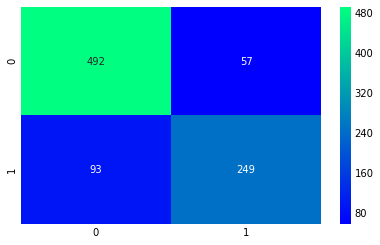

In [104]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada,X,y, cv=10)
sns.heatmap(confusion_matrix(y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

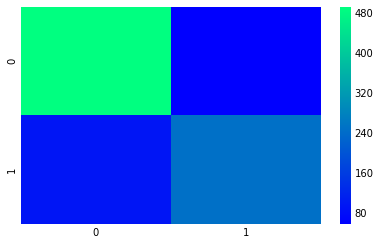

In [105]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada,X,y, cv=10)
sns.heatmap(confusion_matrix(y, result), cmap='winter', annot=False, fmt='2.0f')
plt.show()

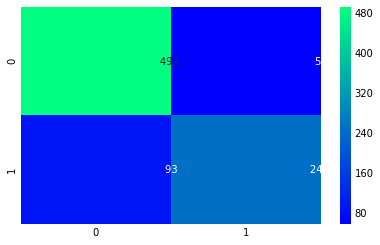

In [109]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada,X,y, cv=10)
sns.heatmap(confusion_matrix(y, result), cmap='winter', annot=True, fmt='50.0f')
plt.show()

### Feature Importance

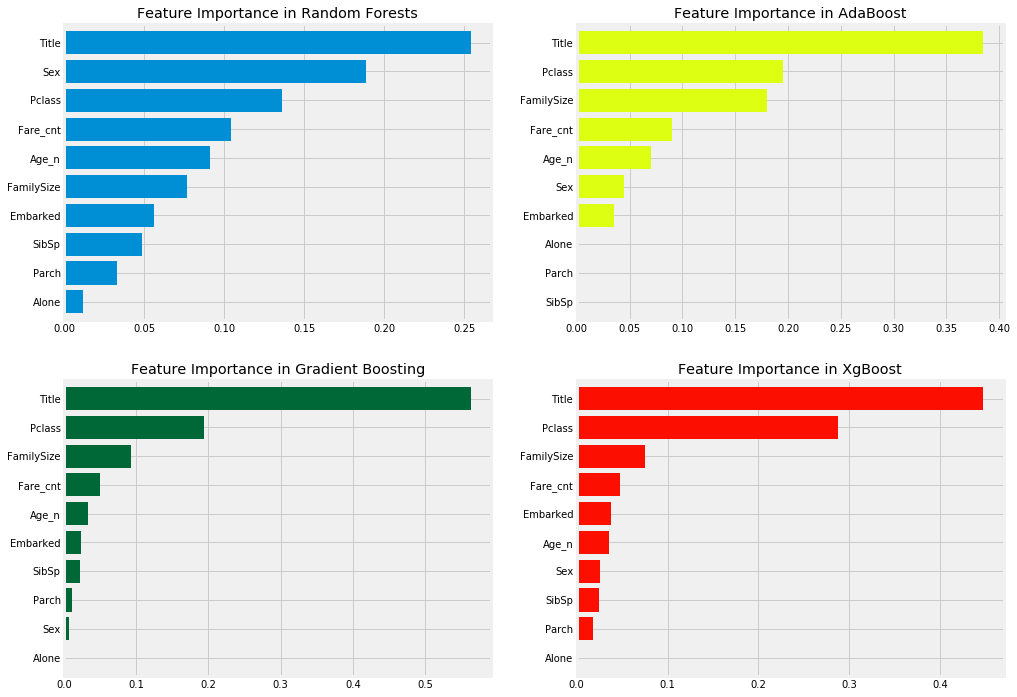

In [110]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()